In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import *
from mnist import *
from pandas import *
from datetime import date

import cv2
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *
from sklearn.metrics import confusion_matrix
import itertools
import os
from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *

In [136]:
homePath_train = "/home/giang/Desktop/ThucTap/charTrainset/"

In [137]:
chars = [chr(i) for i in range(65, 91)]
for i in range(0, 10):
    chars.append(str(i))
# print(len(chars))
# chars = [str(i) for i in range(0,10)]
NUM_TRAIN = 6500
NUM_VAL = 7300
chars.remove('I')
chars.remove('J')
chars.remove('O')
chars.remove('Q')
chars.remove('W')

In [138]:
print(size(chars))
chars

31


<ipython-input-138-a49c5d735cb6>:1: DeprecationWarning: scipy.size is deprecated and will be removed in SciPy 2.0.0, use numpy.size instead
  print(size(chars))


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'K',
 'L',
 'M',
 'N',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'X',
 'Y',
 'Z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [139]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
    for i,char in enumerate(chars):
        imgPath = homePath + char + "/"
        print(imgPath)
        imgFiles = os.listdir(imgPath)
#         kk = 0
        for image in imgFiles:
            img = cv2.imread(imgPath+ image,0)
            img = cv2.resize(img, (28, 28))
#             print(img.shape)
            data.append(img)
#             data.append(img.resize((28, 28)))
#             image.resize((28, 28)), dtype=np.float32
            label.append(i)
#             kk = kk + 1;
#             if kk == 311:
#                 break
    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [140]:
data,label = preprocessdata(homePath_train)

/home/giang/Desktop/ThucTap/charTrainset/A/
/home/giang/Desktop/ThucTap/charTrainset/B/
/home/giang/Desktop/ThucTap/charTrainset/C/
/home/giang/Desktop/ThucTap/charTrainset/D/
/home/giang/Desktop/ThucTap/charTrainset/E/
/home/giang/Desktop/ThucTap/charTrainset/F/
/home/giang/Desktop/ThucTap/charTrainset/G/
/home/giang/Desktop/ThucTap/charTrainset/H/
/home/giang/Desktop/ThucTap/charTrainset/K/
/home/giang/Desktop/ThucTap/charTrainset/L/
/home/giang/Desktop/ThucTap/charTrainset/M/
/home/giang/Desktop/ThucTap/charTrainset/N/
/home/giang/Desktop/ThucTap/charTrainset/P/
/home/giang/Desktop/ThucTap/charTrainset/R/
/home/giang/Desktop/ThucTap/charTrainset/S/
/home/giang/Desktop/ThucTap/charTrainset/T/
/home/giang/Desktop/ThucTap/charTrainset/U/
/home/giang/Desktop/ThucTap/charTrainset/V/
/home/giang/Desktop/ThucTap/charTrainset/X/
/home/giang/Desktop/ThucTap/charTrainset/Y/
/home/giang/Desktop/ThucTap/charTrainset/Z/
/home/giang/Desktop/ThucTap/charTrainset/0/
/home/giang/Desktop/ThucTap/char

In [141]:
x = data
y = label

In [142]:
df_label = pd.DataFrame(label, columns = ['label_'])
df_label

,label_
0,0
1,0
2,0
3,0
4,0
...,...
1832,30
1833,30
1834,30
1835,30


In [162]:
df_label.label_.value_counts()

4     67
29    67
19    66
24    65
23    64
18    64
21    63
6     63
26    62
5     62
20    62
8     61
10    60
0     60
7     60
12    60
28    60
13    60
15    58
11    57
3     57
30    57
14    56
16    56
17    55
9     54
22    54
25    54
2     54
1     54
27    45
Name: label_, dtype: int64

In [144]:
size(label)

<ipython-input-144-7338560c4d8c>:1: DeprecationWarning: scipy.size is deprecated and will be removed in SciPy 2.0.0, use numpy.size instead
  size(label)


1837

In [145]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [146]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_tt = y_test
# X_train = x
# y_train = y

In [147]:
X_train = reshape(X_train,(-1,28,28,1))
y_train = to_categorical(y_train, num_classes = 31)
X_test = reshape(X_test,(-1,28,28,1))
y_test = to_categorical(y_test, num_classes = 31)

<ipython-input-147-ac1d0bc342f1>:1: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_train = reshape(X_train,(-1,28,28,1))
<ipython-input-147-ac1d0bc342f1>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_test = reshape(X_test,(-1,28,28,1))


In [148]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(31, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# model.summary()
res = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,
                 batch_size=32, epochs=15, verbose=1)

model.save("digit_model_plate.h5")

Train on 1175 samples, validate on 294 samples
Epoch 1/15
1175/1175 [==============================] - 1s 1ms/step - loss: 3.5219 - accuracy: 0.4426 - val_loss: 0.4013 - val_accuracy: 0.8878
Epoch 2/15
1175/1175 [==============================] - 1s 1ms/step - loss: 0.2885 - accuracy: 0.9191 - val_loss: 0.2557 - val_accuracy: 0.9320
Epoch 3/15
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0967 - accuracy: 0.9668 - val_loss: 0.1313 - val_accuracy: 0.9660
Epoch 4/15
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0622 - accuracy: 0.9804 - val_loss: 0.1945 - val_accuracy: 0.9592
Epoch 5/15
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0615 - accuracy: 0.9855 - val_loss: 0.1240 - val_accuracy: 0.9626
Epoch 6/15
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0585 - accuracy: 0.9847 - val_loss: 0.0943 - val_accuracy: 0.9592
Epoch 7/15
1175/1175 [==============================] - 1s 1ms/step - loss: 0.0390 - accu

In [149]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.11574306396220851, 0.97826087474823]

In [150]:
results = chars.copy()

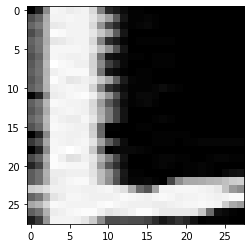

In [151]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [152]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__


'L'

In [153]:
kq = model.predict(X_test)
kq

array([[2.35854869e-09, 1.48821433e-04, 7.75829394e-05, ...,
        4.89005891e-10, 3.27418206e-06, 1.29710116e-07],
       [2.34862558e-13, 2.85873710e-07, 7.14470150e-10, ...,
        1.39917174e-05, 1.32787739e-11, 9.24024146e-09],
       [4.02419346e-06, 7.41792618e-08, 4.29766178e-09, ...,
        2.84392218e-06, 5.60572971e-06, 1.21645511e-08],
       ...,
       [1.14350434e-04, 4.79867682e-04, 1.09317307e-05, ...,
        3.92353400e-07, 1.94337244e-05, 1.21454577e-05],
       [5.27090975e-11, 7.09749373e-26, 1.38621352e-23, ...,
        2.15225922e-14, 4.96290635e-19, 1.39261763e-21],
       [1.48199695e-06, 2.44075295e-07, 4.67129348e-06, ...,
        1.36931781e-08, 2.21498135e-06, 1.83391091e-06]], dtype=float32)

In [154]:
resS = np.argmax(kq, axis=-1)
resS

array([ 9, 23, 24,  1, 30, 20, 11,  0,  3, 25,  9, 26,  2, 26, 25, 30, 14,
        7, 24,  4,  4, 10,  6, 23, 22,  4,  6, 19, 17,  5,  4, 23, 26,  8,
       18,  1,  0, 18, 18, 20,  7, 20, 19,  2, 15,  1, 14, 23,  9, 19, 24,
       13, 14, 26, 27, 25, 15, 18,  3, 23, 19, 30,  3, 28, 19, 18, 19, 20,
        5, 29, 28,  3, 29,  6, 18,  9, 11, 11, 12, 27, 26, 10, 17, 19, 17,
        4, 24, 28, 13, 10, 27, 28, 11,  5,  8, 17, 15,  2, 29,  5, 18,  1,
       21, 25, 18, 13,  6, 13, 23, 25, 17,  9, 16,  8, 16, 10, 15,  5,  6,
        5, 19,  5, 14, 11,  5, 24, 30,  4, 22,  0, 12, 29, 13, 24, 30, 24,
       28,  4, 26,  6,  7, 24, 26,  5,  9, 18, 12, 23, 13,  1, 15, 10, 25,
       16, 13,  4,  7, 16,  8, 11,  2, 28,  5, 13,  1, 25, 14, 22, 16,  2,
       10, 22,  4,  3, 10, 15, 30, 16, 14,  7, 30,  3, 26, 25,  1, 29, 15,
        6, 19, 26,  4, 25, 18, 20, 29, 29, 13, 25, 26,  8, 20, 11, 18,  9,
        2, 22, 22,  6,  1, 10, 24, 10, 30, 25, 12, 28, 24, 22, 23,  0, 17,
        8, 15,  5, 24,  6

In [155]:
print(confusion_matrix(y_tt, resS))

[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  2  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 

In [189]:
def PrintResult(path):
    im = cv2.imread(path, 1)
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # giảm noise và tăng edge
    noise_removal = cv2.bilateralFilter(im_gray,9,75,75)
    # can bang anh ( không quá sáng hoặc tối )
    equal_histogram = cv2.equalizeHist(noise_removal)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)
    # xoa phong k can thiet
    sub_morp_image = cv2.subtract(equal_histogram,morph_image)
    ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
    # phat hien canh
    canny_image = cv2.Canny(thresh_image,250,255)
    kernel = np.ones((3,3), np.uint8)
    dilated_image = cv2.dilate(canny_image,kernel,iterations=1)

    # in anh

    # cv2.imshow('xemoine', dilated_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # _,cont,hier = cv2.findContours(thre_mor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None
    for c in contours:
        # tinh chu vi cua tung contours
        peri = cv2.arcLength(c, True) 
        # xap xi da giac
        approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
        # giu lai hinh chu nhat ( co 4 canh )
        if len(approx) == 4:
            screenCnt = approx
            break

    # tim box theo screenCnt
    (x,y,w,h) = cv2.boundingRect(screenCnt)
    # ve
    # cv2.imshow('xemoine', im)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    cv2.rectangle(im,(x,y),(x+w,y+h),color=(0,255,0),thickness=2)
    roi = thresh_image[y:y+h,x:x+w]
    roi_img = im[y:y+h,x:x+w]
#     print(screenCnt)
    # roi = im[y:y+h,x:x+w]
    # roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
    # roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    # roi = cv2.dilate(roi, (3, 3))

    # cv2.imshow('xemoine', roi_img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    roi_blur = cv2.GaussianBlur(roi,(3,3),1)
    ret,thre = cv2.threshold(roi_blur,120,255,cv2.THRESH_BINARY_INV)
    kerel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    thre_mor = cv2.morphologyEx(thre,cv2.MORPH_DILATE,kerel3)
    cont,hier = cv2.findContours(thre_mor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

    areas_ind = {}
    areas = []

    for ind,cnt in enumerate(cont) :
        area = cv2.contourArea(cnt)
        areas_ind[area] = ind
        areas.append(area)

#     print(len(areas))
    string = []
    MIN_SIZE = 24
    for i in areas:
        (x,y,w,h) = cv2.boundingRect(cont[areas_ind[i]])
#         print("h = ", h)
#       bo qua nhieu
        if (h < MIN_SIZE and w < MIN_SIZE):
            continue
#       bo qua khung
        if (h > 150 and w > 150):
            continue
            
        cv2.rectangle(roi_img,(x,y),(x+w,y+h),(0,255,0),2)
        
#         cat ra de nhan dien
        roi = thre_mor[y:y+h,x:x+w]
        roi = cv2.resize(roi, (28, 28))
#         plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
#         plt.show()
        test_x = reshape(roi,(-1,28,28,1))
        test_logits = model.predict(test_x)
        
        # lấy phần tử có giá trị lớn nhất 
        test_logits = np.argmax(test_logits, axis=-1)
        
        res__ = results[int(test_logits)]
        print("digit = ", res__)
        cv2.putText(roi_img, str(res__), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (255, 255, 0), 3)
        string.append(res__)
    
    bien_so_xe = ""

    for i in range(len(string) - 4, len(string)):
        bien_so_xe = bien_so_xe + string[i]

        if(i == len(string) - 3):
            bien_so_xe += "-"
    
    bien_so_xe += " "
    
    for i in range(len(string) - 4):
        bien_so_xe = bien_so_xe + string[i]
    
    plt.imshow(cv2.cvtColor(roi_img,cv2.COLOR_BGR2RGB))
    plt.title(bien_so_xe)
    plt.show()

digit =  2
digit =  2
digit =  2
digit =  2
digit =  6
digit =  1
digit =  T
digit =  3


<ipython-input-189-99d25e959f40>:91: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  test_x = reshape(roi,(-1,28,28,1))


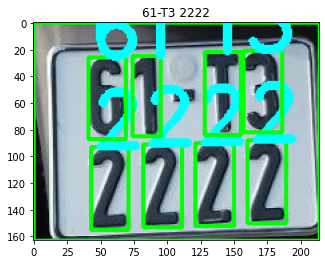

In [190]:
img_path = "/home/giang/Desktop/Test/TestML/xe10.jpg"
PrintResult(img_path)


In [161]:
so6 = cv2.imread("/home/giang/Desktop/ThucTap/so6.jpg", 0)
so6 = cv2.resize(so6, (28, 28))
test_so6 = reshape(so6,(-1,28,28,1))
y_predict = model.predict(test_so6.reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__

<ipython-input-161-a004bab1ca3f>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  test_so6 = reshape(so6,(-1,28,28,1))


'6'